In [8]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')


In [7]:
df_book = pd.read_csv('Books.csv')
df_rating = pd.read_csv('Ratings.csv')
df_user = pd.read_csv('Users.csv')


KeyboardInterrupt: 

In [ ]:
data = pd.merge(df_rating, df_user, on='User-ID')
data = pd.merge(data, df_book, on='ISBN')
data.head(3)


,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,"tyler, texas, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,"cincinnati, ohio, usa",23.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,"strafford, missouri, usa",34.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [ ]:
data.isna().sum()


User-ID                     0
ISBN                        0
Book-Rating                 0
Location                    0
Age                    277835
Book-Title                  0
Book-Author                 1
Year-Of-Publication         0
Publisher                   2
Image-URL-S                 0
Image-URL-M                 0
Image-URL-L                 4
dtype: int64

In [ ]:
data1 = data.dropna(axis=0)

In [ ]:
data1.isna().sum()

User-ID                0
ISBN                   0
Book-Rating            0
Location               0
Age                    0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 753296 entries, 1 to 1031133
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   User-ID              753296 non-null  int64  
 1   ISBN                 753296 non-null  object 
 2   Book-Rating          753296 non-null  int64  
 3   Location             753296 non-null  object 
 4   Age                  753296 non-null  float64
 5   Book-Title           753296 non-null  object 
 6   Book-Author          753296 non-null  object 
 7   Year-Of-Publication  753296 non-null  object 
 8   Publisher            753296 non-null  object 
 9   Image-URL-S          753296 non-null  object 
 10  Image-URL-M          753296 non-null  object 
 11  Image-URL-L          753296 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 74.7+ MB


In [ ]:
data2 = data1[['Book-Rating', 'Location',
              'Age', 'Book-Title', 'Year-Of-Publication', 'Publisher']]
data2.head(3)


,Book-Rating,Location,Age,Book-Title,Year-Of-Publication,Publisher
1,5,"cincinnati, ohio, usa",23.0,Flesh Tones: A Novel,2002,Ballantine Books
2,0,"strafford, missouri, usa",34.0,Flesh Tones: A Novel,2002,Ballantine Books
3,5,"st. charles county, missouri, usa",2.0,Flesh Tones: A Novel,2002,Ballantine Books


In [ ]:
import re

In [ ]:
result = map(lambda x: re.sub(r'^s+|s+$', '',
             x.split(',')[2]), data2['Location'])
data2['Country'] = list(result)


In [ ]:
data2.to_csv('data2.csv', index=False)

In [ ]:

for index, row in data2.iterrows():
    if len(str(row['Year-Of-Publication'])) != 4:
        print(index)
        data2.drop(index, inplace=True)

1885
1886
1887
1889
1890
1891
2496
2497
2499
2500
2502
2503
2504
2506
2507
2846
2847
2848
2849
2850
2851
3034
3050
3051
3052
3466
3467
3474
3475
3560
3561
3562
3563
3564
4647
4716
4717
4718
4719
4720
4949
4950
4951
4952
4973
4982
5624
5627
5631
5634
5635
5637
5638
5639
5642
5643
5644
5645
5646
5647
5649
5650
5651
5652
5654
5655
5656
5657
5658
5659
5661
5663
5664
5665
5666
5667
5668
5807
5809
5812
5814
5815
5816
5817
5819
5820
5821
5823
5824
5825
5827
5831
5832
5833
5834
5835
5836
5837
5838
5839
5840
5841
6245
6246
12937
12938
12939
12941
12942
12943
12944
12945
12946
12947
13153
13154
13155
13156
13157
13158
13159
13160
13161
13162
13163
13164
13165
13166
14127
16974
16975
16976
16977
16979
16980
16981
16983
16984
16985
16986
16987
16988
20169
20170
20171
20174
20176
20177
20178
20179
20180
20181
20183
20184
20185
20186
20188
20189
20190
20191
20192
20193
20194
20197
20198
20199
20200
20201
20202
20204
20205
20206
20207
20208
20209
20210
20211
20212
20214
20215
20216
20218
20219
20220


In [ ]:
len(data2['Age']) 

742854

In [ ]:
data3 = data2.copy()

In [ ]:
data3.to_csv('data3.csv', index=False)


In [ ]:
data3.tail(3)

,Book-Rating,Location,Age,Book-Title,Year-Of-Publication,Publisher,Country
1031122,0,"chicago, illinois, usa",43.0,Access 2000 for Windows for Dummies,1999,For Dummies,usa
1031123,10,"chicago, illinois, usa",43.0,Chorus,2003,Dry Bones Press,usa
1031133,0,"wakeman, ohio, usa",43.0,Triplet Trouble and the Class Trip (Triplet Tr...,1997,Apple,usa


In [ ]:
data4 = data3.drop(['Location'], axis=1)

In [ ]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742854 entries, 1 to 1031133
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Book-Rating          742854 non-null  int64  
 1   Age                  742854 non-null  float64
 2   Book-Title           742854 non-null  object 
 3   Year-Of-Publication  742854 non-null  object 
 4   Publisher            742854 non-null  object 
 5   Country              742854 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 39.7+ MB


In [ ]:
data4.head(3)

,Book-Rating,Age,Book-Title,Year-Of-Publication,Publisher,Country
1,5,23.0,Flesh Tones: A Novel,2002,Ballantine Books,usa
2,0,34.0,Flesh Tones: A Novel,2002,Ballantine Books,usa
3,5,2.0,Flesh Tones: A Novel,2002,Ballantine Books,usa


In [ ]:
data4.to_csv('data4.csv', index=False)

In [ ]:
data4 = pd.read_csv('data4.csv')

In [ ]:
temp = data4.copy()

In [ ]:
data4 = data4[['Book-Title', 'Publisher', 'Country']]
data4.head(2)

,Book-Title,Publisher,Country
0,Flesh Tones: A Novel,Ballantine Books,usa
1,Flesh Tones: A Novel,Ballantine Books,usa


In [ ]:
temp.columns = ['Book-Rating', 'Age', 'Book-Title-Num', 'Year-Of-Publication', 'Publisher-Num', 'Country-Num']

In [ ]:
temp.head(2)

,Book-Rating,Age,Book-Title-Num,Year-Of-Publication,Publisher-Num,Country-Num
0,5,23,Flesh Tones: A Novel,2002,Ballantine Books,usa
1,0,34,Flesh Tones: A Novel,2002,Ballantine Books,usa


In [ ]:
data5 = pd.concat([temp, data4], axis=1)

In [ ]:
data5.head(2)

,Book-Rating,Age,Book-Title-Num,Year-Of-Publication,Publisher-Num,Country-Num,Book-Title,Publisher,Country
0,5,23,Flesh Tones: A Novel,2002,Ballantine Books,usa,Flesh Tones: A Novel,Ballantine Books,usa
1,0,34,Flesh Tones: A Novel,2002,Ballantine Books,usa,Flesh Tones: A Novel,Ballantine Books,usa


In [ ]:
data5.to_csv('data5.csv', index=False)

In [ ]:
data5 = pd.read_csv('data5.csv')

In [ ]:
len(data5[data5['Age'] < 1])

541

In [ ]:
for index, row in data5.iterrows():
    if row['Age'] < 1:
        print(index)
        data5.drop(index, inplace=True)


676
1714
2163
3928
4171
4675
5250
7512
7568
8293
8837
9189
10058
10269
10519
10774
14952
15217
18616
20091
21786
25708
27144
28457
28978
31558
32734
36457
38594
40119
41891
43932
44441
44730
47688
52452
52944
54140
55481
63255
64054
64948
73377
73642
73879
74121
78019
78779
79871
81832
89097
90167
90526
91719
92490
93618
93674
94886
95528
95663
95887
100282
100524
100549
101170
102142
102879
103311
104454
106606
109865
110470
112028
112173
113309
113904
117844
120808
120993
123655
124014
125052
125227
125646
126024
126878
127619
129616
131276
132458
133414
135311
138998
144995
146119
146887
149262
151304
152049
154023
154771
156274
156693
159681
161396
162639
162890
164763
164918
169469
170989
173385
174417
176533
178020
179138
179382
182318
182794
182881
182882
183500
184999
188018
188383
188794
190206
193327
194543
195828
197150
200184
201134
203479
203743
208331
208584
210873
213211
213653
216178
218071
219162
220489
228283
228356
229091
231457
231906
232084
234838
239751
242365
242

In [ ]:
len(data5[data5['Age'] < 1])


0

In [ ]:
import category_encoders as ce


In [ ]:
encoder = ce.OrdinalEncoder(cols=['Book-Title-Num', 'Publisher-Num', 'Country-Num'])

data6 = encoder.fit_transform(data5)
data6.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 742313 entries, 0 to 742853
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Book-Rating          742313 non-null  int64 
 1   Age                  742313 non-null  int64 
 2   Book-Title-Num       742313 non-null  int32 
 3   Year-Of-Publication  742313 non-null  int64 
 4   Publisher-Num        742313 non-null  int32 
 5   Country-Num          742313 non-null  int32 
 6   Book-Title           742313 non-null  object
 7   Publisher            742313 non-null  object
 8   Country              731721 non-null  object
dtypes: int32(3), int64(3), object(3)
memory usage: 48.1+ MB


In [ ]:
data6.to_csv('data6.csv', index=False)

In [ ]:
data6.isna().sum()

Book-Rating                0
Age                        0
Book-Title-Num             0
Year-Of-Publication        0
Publisher-Num              0
Country-Num                0
Book-Title                 0
Publisher                  0
Country                10592
dtype: int64

In [ ]:
data7 = data6.dropna()

In [ ]:
data7.isna().sum()

Book-Rating            0
Age                    0
Book-Title-Num         0
Year-Of-Publication    0
Publisher-Num          0
Country-Num            0
Book-Title             0
Publisher              0
Country                0
dtype: int64

In [ ]:
data7.to_csv('data7.csv', index=False)

In [ ]:
data7 = pd.read_csv('data7.csv')

In [ ]:
data7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731721 entries, 0 to 731720
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Book-Rating          731721 non-null  int64 
 1   Age                  731721 non-null  int64 
 2   Book-Title-Num       731721 non-null  int64 
 3   Year-Of-Publication  731721 non-null  int64 
 4   Publisher-Num        731721 non-null  int64 
 5   Country-Num          731721 non-null  int64 
 6   Book-Title           731721 non-null  object
 7   Publisher            731721 non-null  object
 8   Country              731721 non-null  object
dtypes: int64(6), object(3)
memory usage: 50.2+ MB


In [ ]:
data8 = data7[['Book-Rating', 'Age', 'Book-Title-Num','Year-Of-Publication', 'Publisher-Num', 'Country-Num']]


In [ ]:
data8.to_csv('data8.csv', index=False)

In [9]:
data8 = pd.read_csv('data8.csv')

In [10]:
import seaborn as sns

In [11]:
data8_corr = data8.corr()

<AxesSubplot:>

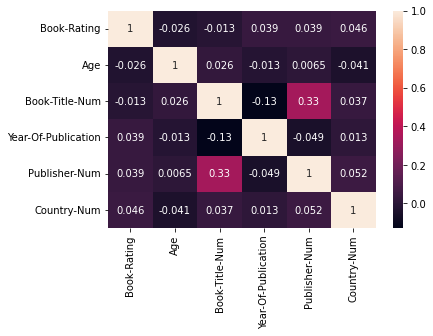

In [12]:
sns.heatmap(data8_corr,annot=True)

In [50]:
X = data8.drop(['Book-Title-Num', 'Book-Rating', 'Year-Of-Publication'], axis=1)
y = data8['Book-Title-Num']

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)


In [52]:
from sklearn.tree import DecisionTreeRegressor


In [59]:
decission_tree = DecisionTreeRegressor(max_depth=15)
decission_tree.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=15)

In [60]:
y_pred_train = decission_tree.predict(X_train)
y_pred_test = decission_tree.predict(X_test)


In [61]:
print('Training set score: {:.2f}'.format(
    decission_tree.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(decission_tree.score(X_test, y_test)))


Training set score: 0.30
Test set score: 0.24
